In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.neighbors import BallTree
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from typing import Type
import optuna

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# train, test 데이터 불러오기
data_path: str = "~/house/data"
train_data: pd.DataFrame = pd.read_csv(os.path.join(data_path, "train.csv"))
test_data: pd.DataFrame = pd.read_csv(os.path.join(data_path, "test.csv"))
sample_submission: pd.DataFrame = pd.read_csv(os.path.join(data_path, "sample_submission.csv"))

In [8]:
# 금리, 지하철, 학교, 공원 정보 불러오기
interest_data: pd.DataFrame = pd.read_csv(os.path.join(data_path, "interestRate.csv"))
subway_data: pd.DataFrame = pd.read_csv(os.path.join(data_path, "subwayInfo.csv"))
school_data: pd.DataFrame = pd.read_csv(os.path.join(data_path, "schoolinfo.csv"))
park_data: pd.DataFrame = pd.read_csv(os.path.join(data_path, "parkInfo.csv"))

In [4]:
park_data["area"]

0         856.0
1         847.0
2        1276.0
3        3300.0
4         394.0
          ...  
17559    2642.0
17560    2654.0
17561    3315.0
17562    2237.0
17563    1644.0
Name: area, Length: 17564, dtype: float64

In [9]:
from data.data_preprocessing import outlier_detection

park_outlier = outlier_detection(park_data["area"])
park_outlier.min()


23421.0

<Axes: xlabel='area', ylabel='Count'>

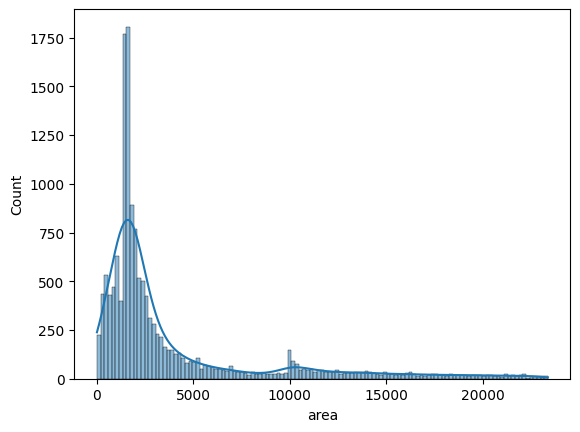

In [10]:
park_data.drop(park_outlier.index, axis=0, inplace=True)
sns.histplot(park_data["area"], kde=True)